In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [2]:
#read data to a dataframe
student_data_df = pd.read_csv('data1.csv')

# Exploratory Data Analysis

In [3]:
# Preview the dataset
student_data_df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [11]:
student_data_df.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [12]:
student_data_df.shape

(4424, 37)

In [4]:
#check the datatypes of each column
student_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
#check the unique count for the target class
student_data_df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [16]:
#Create a new dataframe without the enrolled class as the aim is to predict if a student will 'dropout' or 'graduate'
student_data_df1 = student_data_df[student_data_df.Target!='Enrolled']

In [17]:
#check the unique count for the target class
student_data_df1['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

In [18]:
#check for missing values
student_data_df1.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [125]:
#check for duplicate rows
student_data_df1.duplicated().sum()

0

In [19]:
student_data_df1.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


# Exploratory Data Analysis

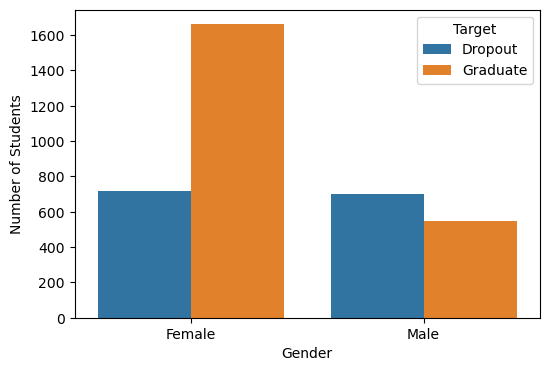

In [33]:
plt.figure(figsize=(6,4))

sns.countplot(data = student_data_df1, x='Gender', hue='Target', hue_order=['Dropout', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

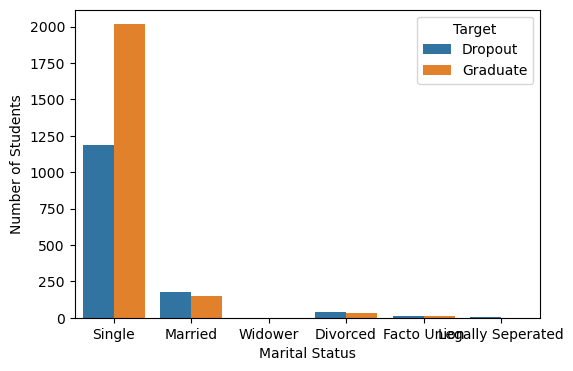

In [34]:
plt.figure(figsize=(6,4))

sns.countplot(data=student_data_df1, x='Marital status', hue='Target', hue_order=['Dropout','Graduate'])

plt.xticks(ticks=[0,1,2,3,4,5], labels=['Single','Married','Widower','Divorced','Facto Union','Legally Seperated'])
plt.xlabel('Marital Status')
plt.ylabel('Number of Students')
plt.show()

<Axes: xlabel='Debtor', ylabel='count'>

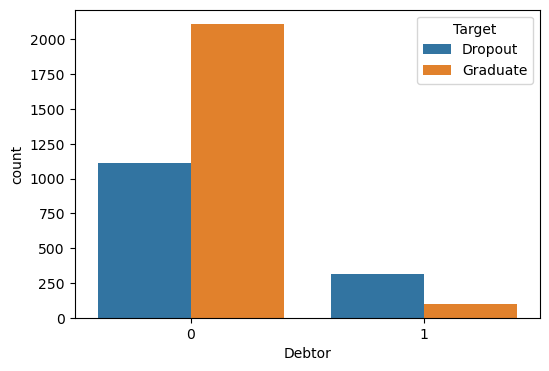

In [35]:
#Visualizing the effect of Debt on dropout rate
plt.figure(figsize=(6,4))
sns.countplot(x=student_data_df1['Debtor'], hue=student_data_df1['Target'])

<Axes: xlabel='Scholarship holder', ylabel='count'>

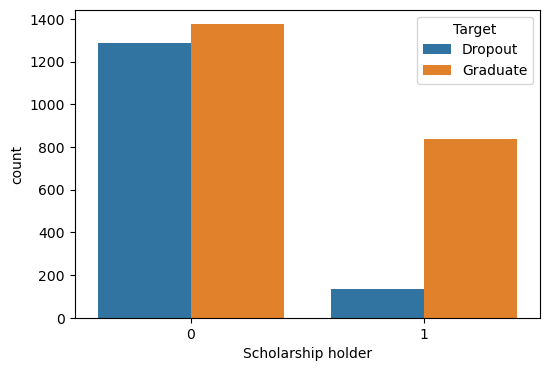

In [39]:
#Visualizing the effect of scholarship on dropout rate
plt.figure(figsize=(6,4))
sns.countplot(x=student_data_df1['Scholarship holder'], hue=student_data_df1['Target'])

In [41]:
import warnings
warnings.filterwarnings('ignore')

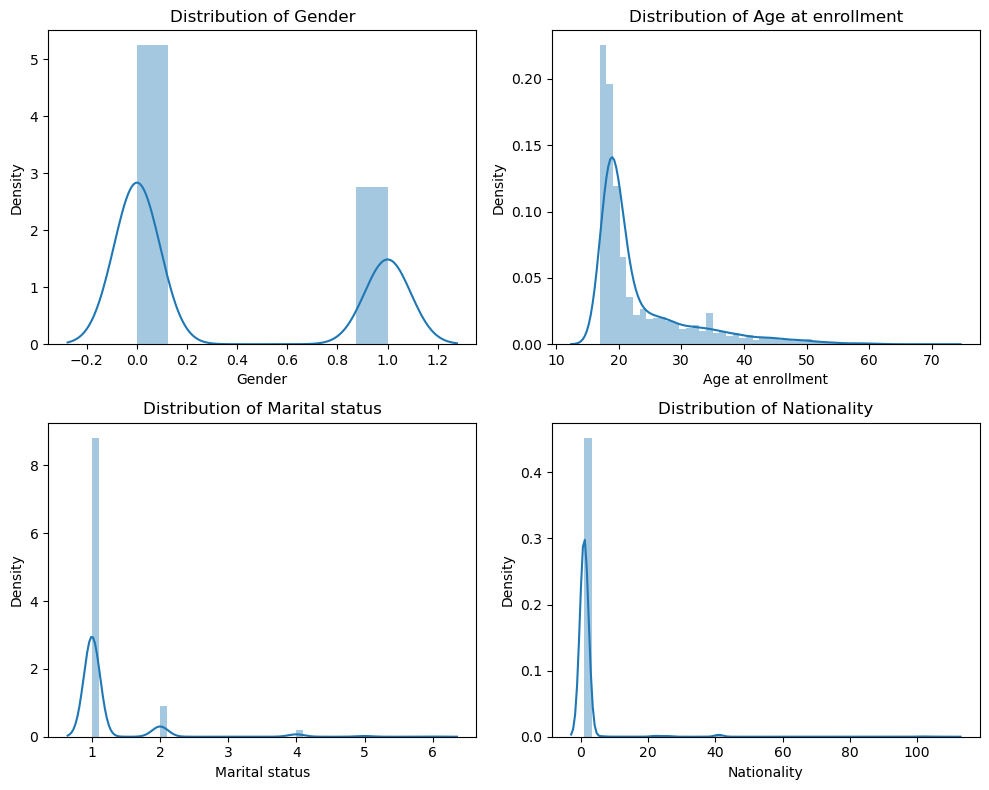

In [42]:
#visualisation of the different categorical variables

personal_attributes = ['Gender', 'Age at enrollment', 'Marital status','Nationality']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(personal_attributes):
    sns.distplot(student_data_df1[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()


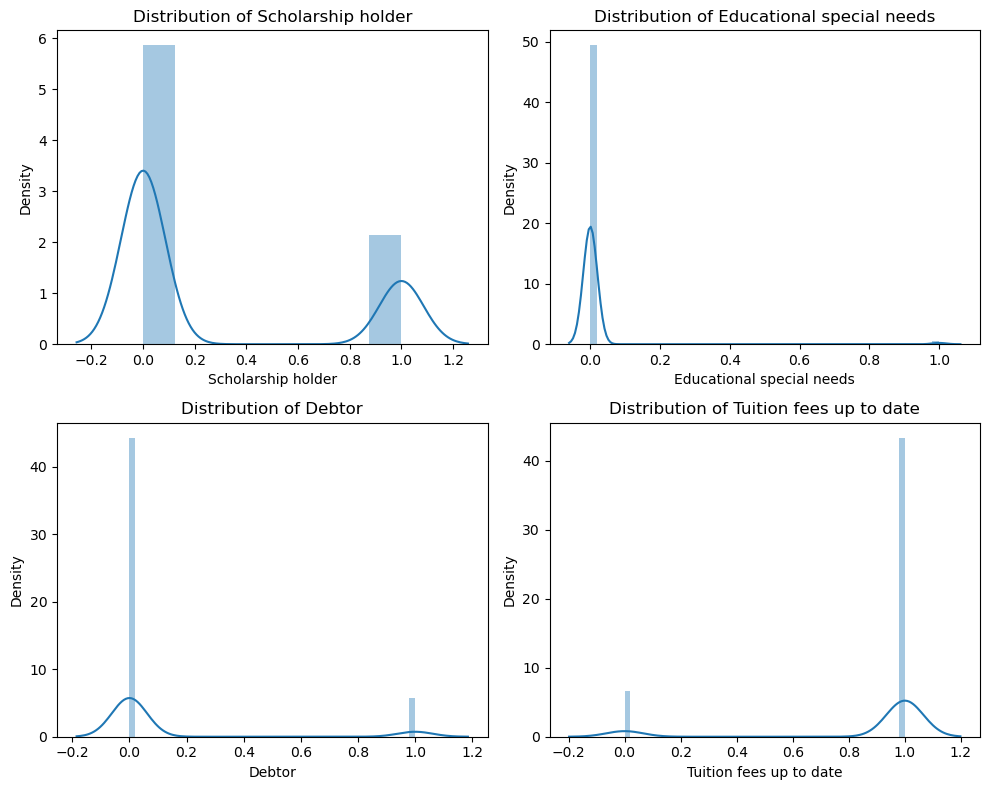

In [43]:
Educational_needs = ['Scholarship holder', 'Educational special needs', 'Debtor','Tuition fees up to date']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(Educational_needs):
    sns.distplot(student_data_df1[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

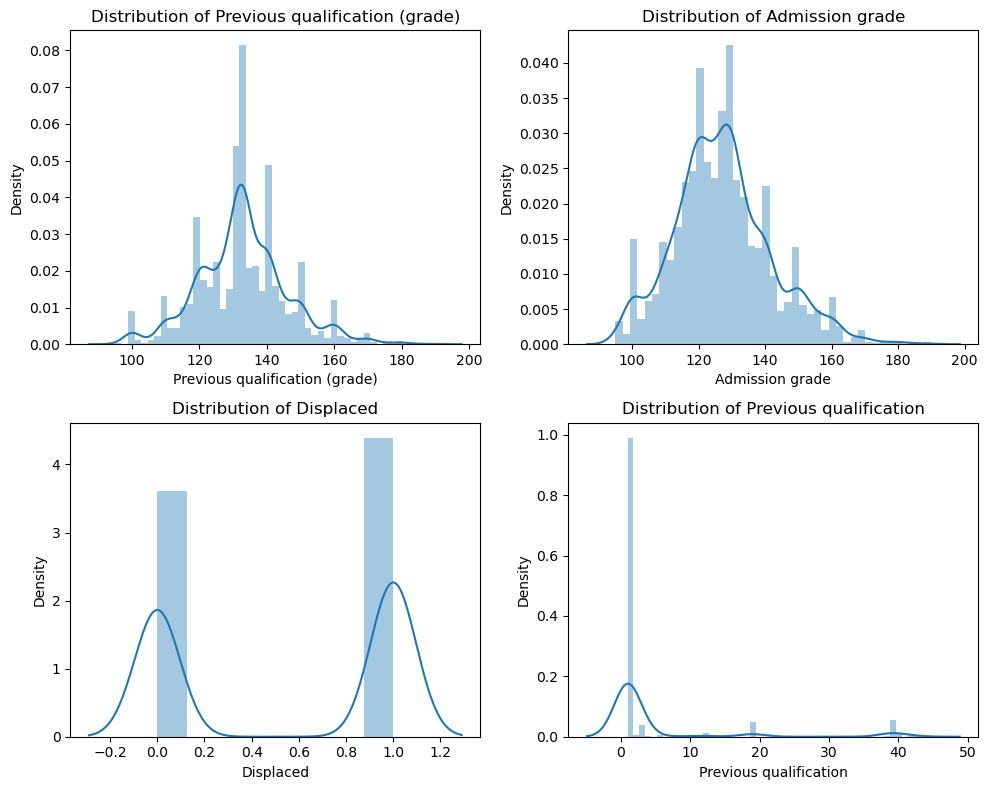

In [44]:
Admission_qualification = ['Previous qualification (grade)', 'Admission grade','Displaced','Previous qualification']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(Admission_qualification):
    sns.distplot(student_data_df1[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()

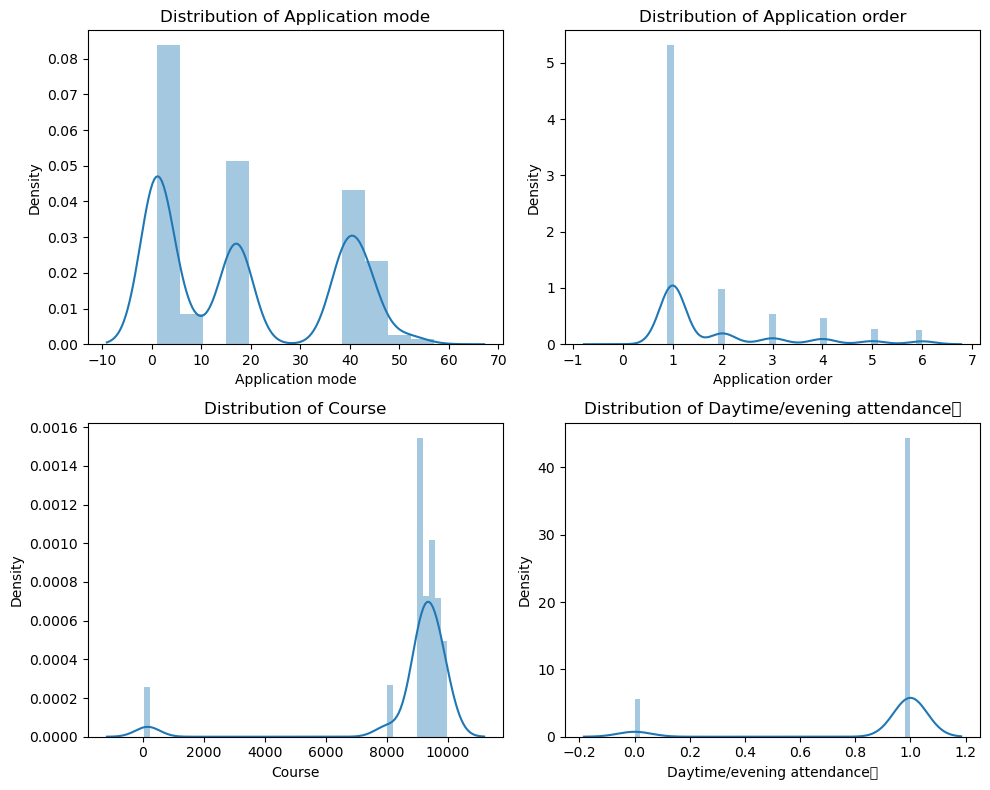

In [45]:
Course_info = ['Application mode', 'Application order','Course','Daytime/evening attendance\t']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(Course_info):
    sns.distplot(student_data_df1[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()

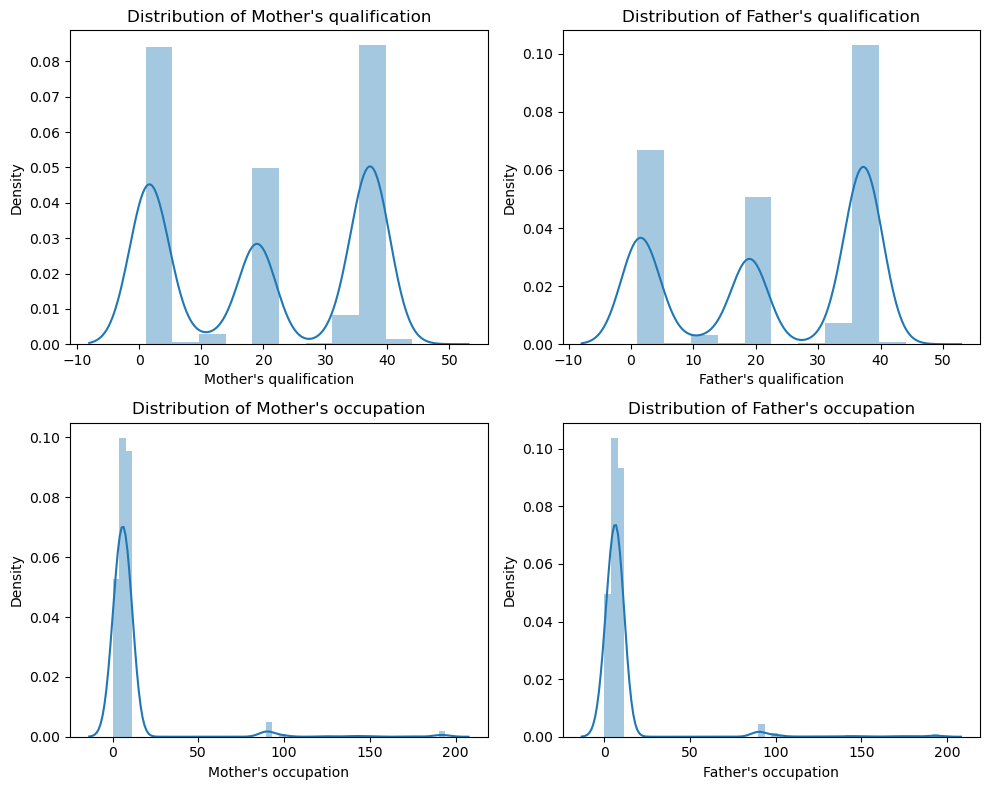

In [46]:
Parental_factors = ["Mother's qualification", "Father's qualification","Mother's occupation","Father's occupation"  ]

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(Parental_factors):
    sns.distplot(student_data_df1[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()

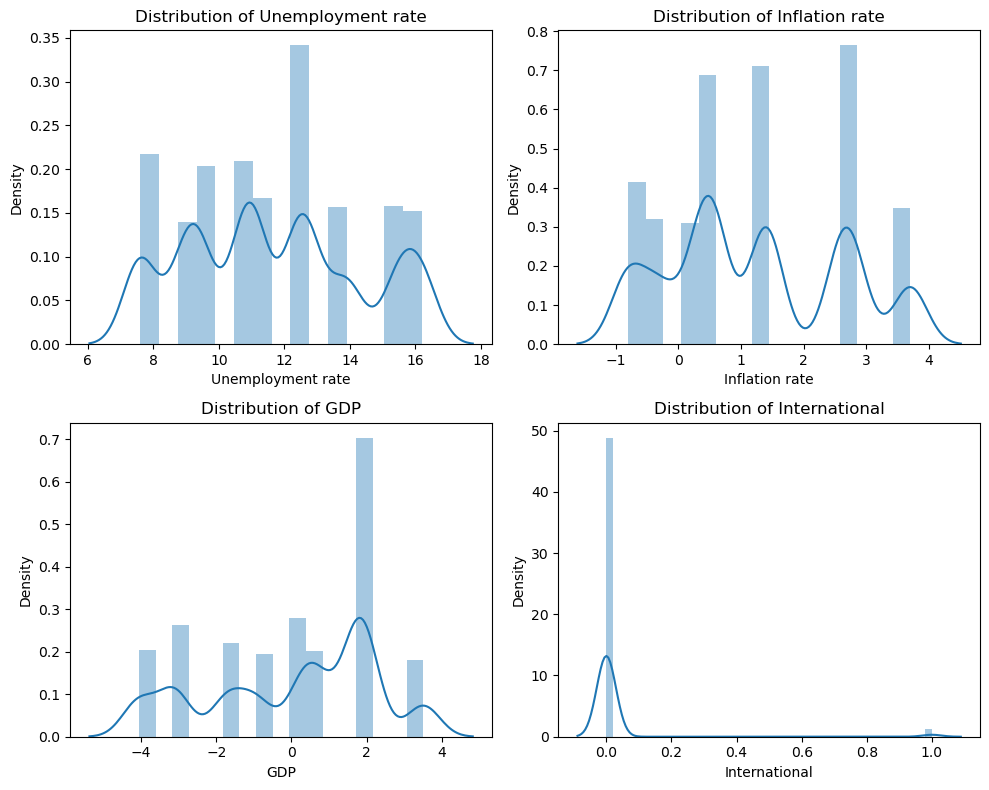

In [47]:
Economic_factors = ['Unemployment rate', 'Inflation rate','GDP','International']

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axes = axes.flatten()

# Plot each column
for i, column in enumerate(Economic_factors):
    sns.distplot(student_data_df1[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()

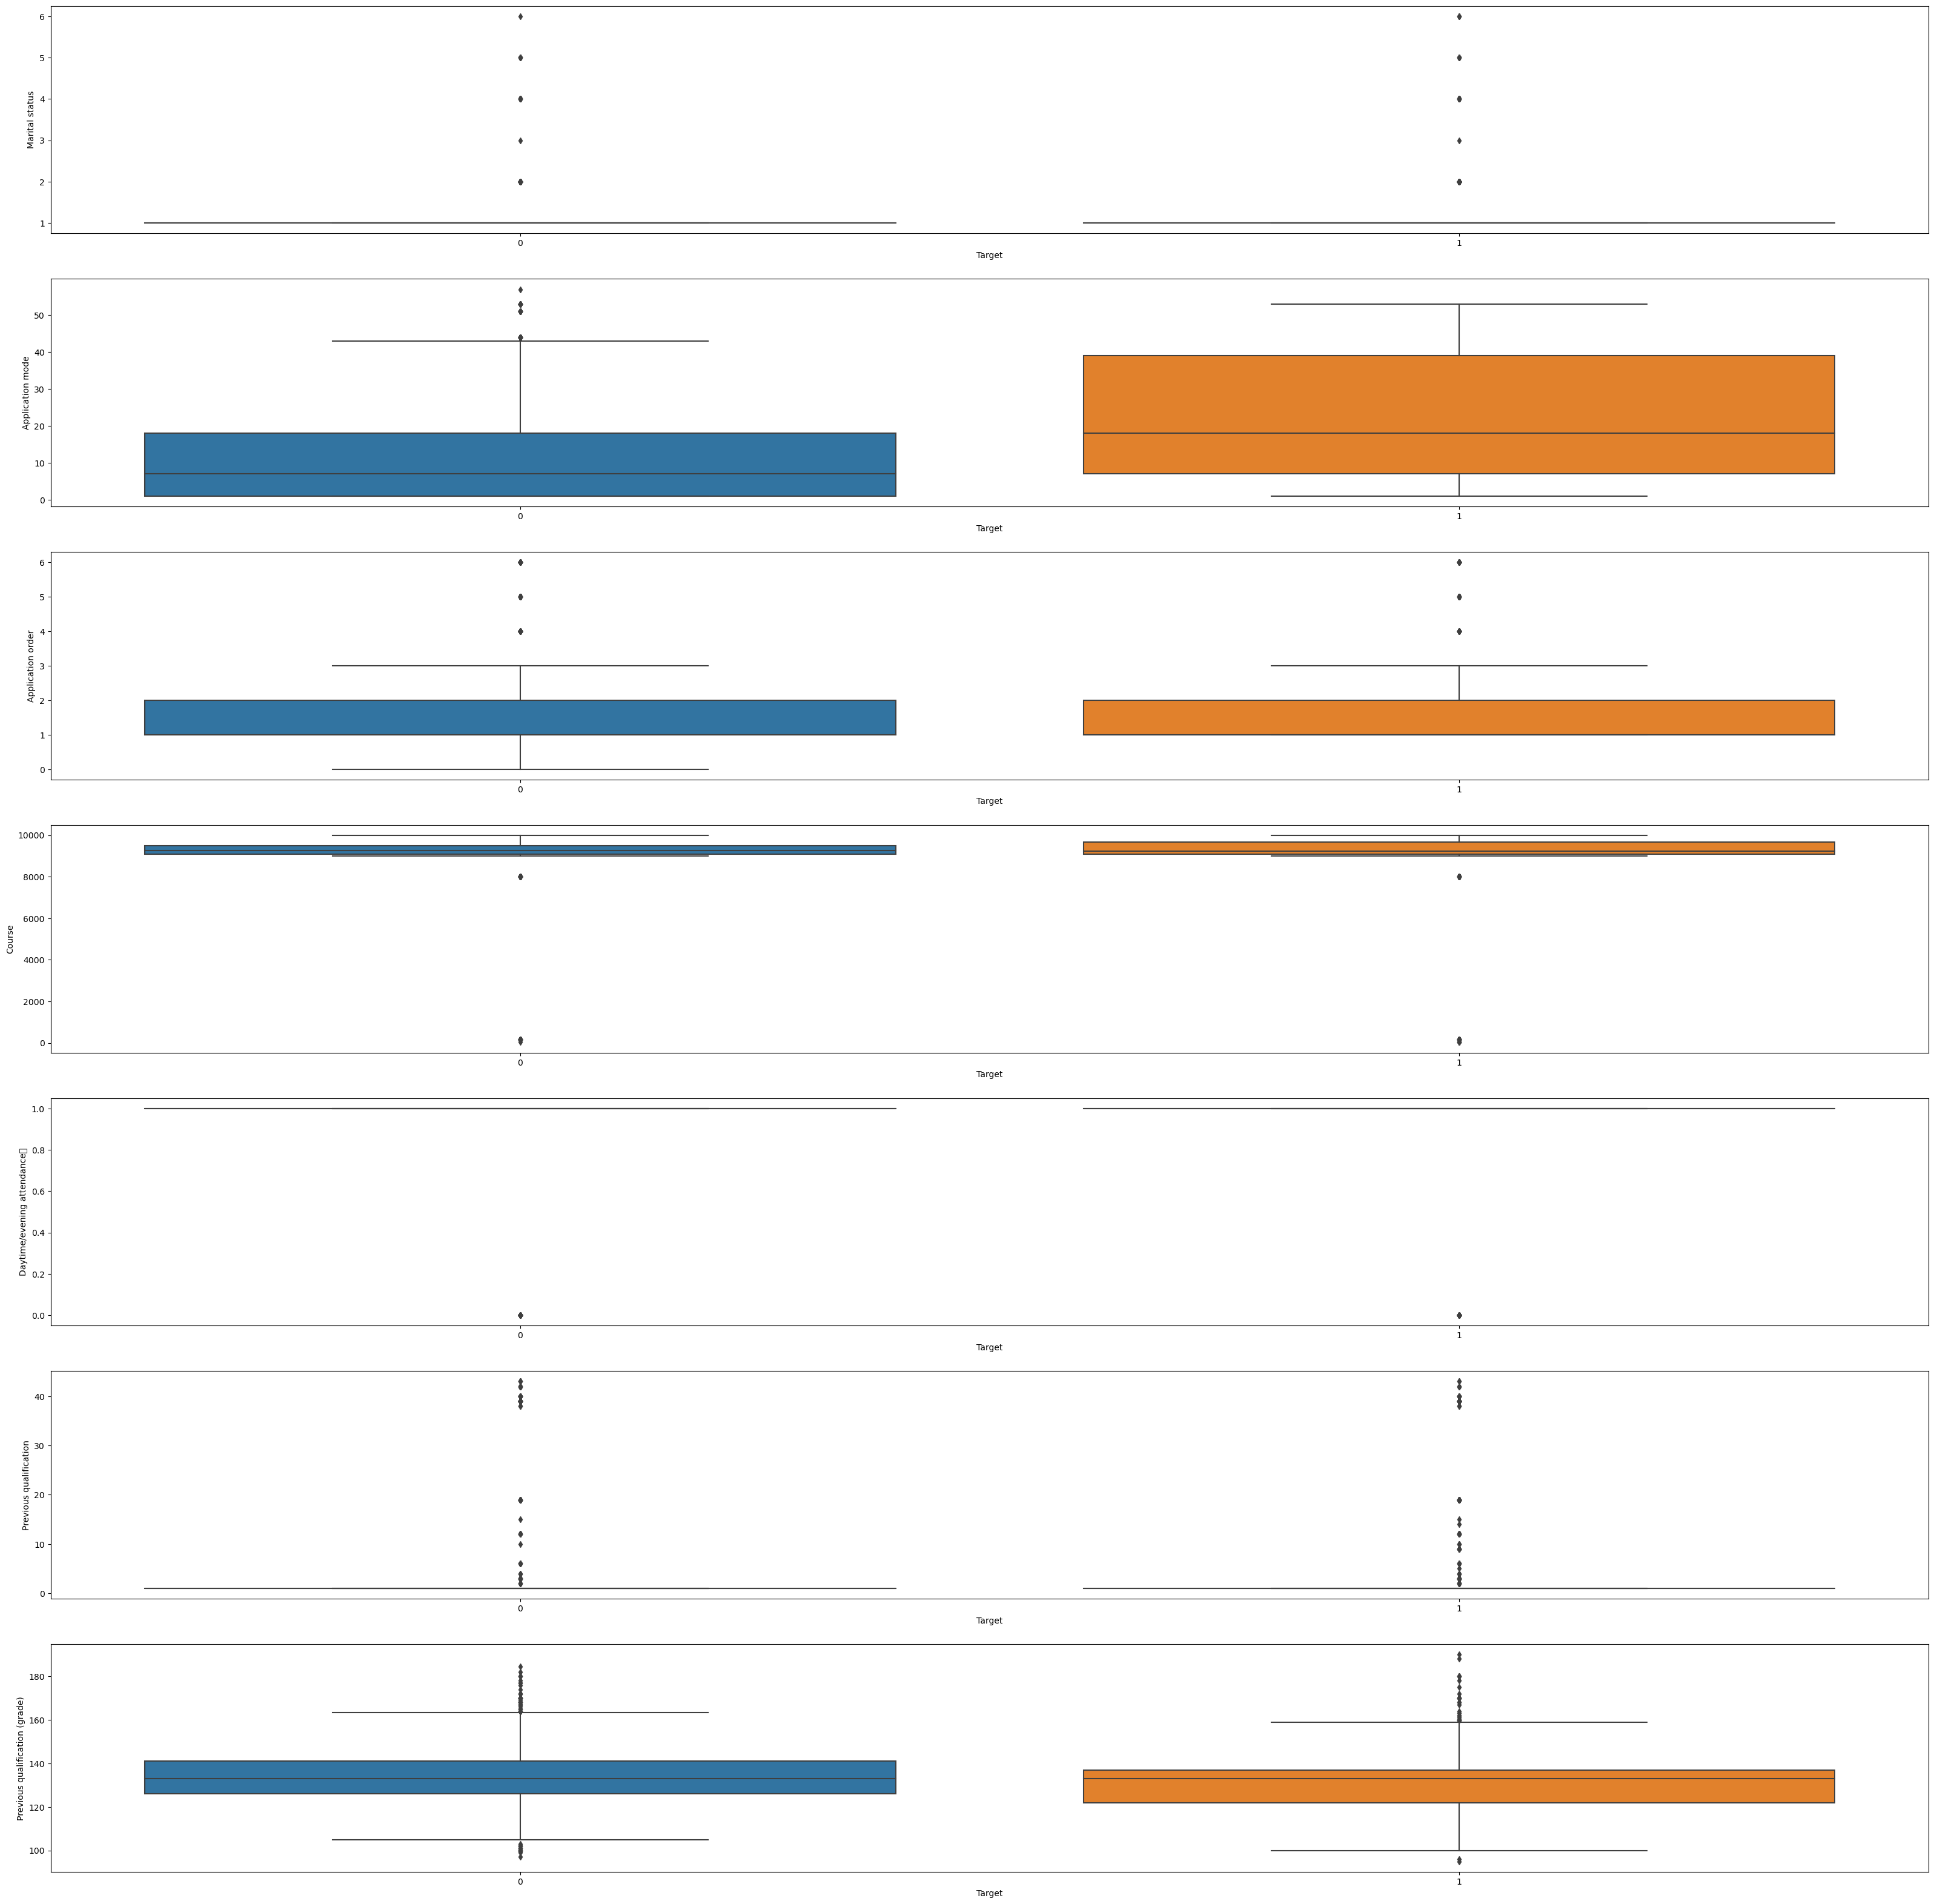

In [129]:
#Visualisation using Boxplot to check for outliers

fig, axes = plt.subplots(nrows = 7, ncols = 2)    
axes = axes.flatten()         
fig.set_size_inches(40,40)

for ax, col in zip(axes, student_data_df1.columns):
  sns.boxplot(x='Target',y=student_data_df1[col], ax = ax , data=student_data_df1)

In [50]:
#check class imbalance of the target class
student_data_df1['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Name: count, dtype: int64

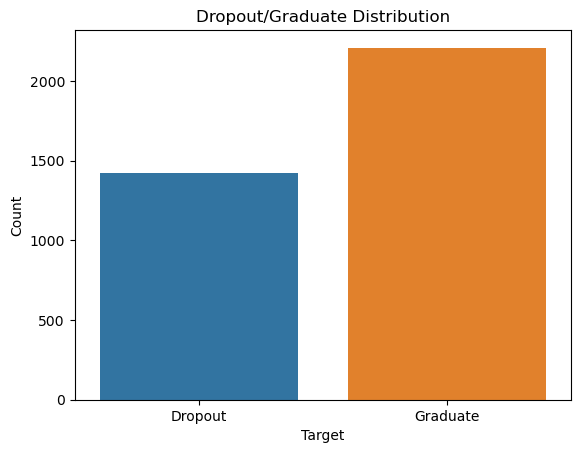

In [49]:
#visualise the target class to compare the dropout students with graduate sudents in terms of total count

sns.countplot(student_data_df1, x="Target")
plt.title('Dropout/Graduate Distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [51]:
#Map the target class to binary variables
student_data_df1 = student_data_df1.replace({ 'Target' : { 'Dropout' : 1, 'Graduate' : 0 } })

# TRAIN AND TEST SPLIT AND FEATURE SELECTION AND SCALING

In [52]:
# setting 'Target' column as target class and other columns as features
X = student_data_df1.drop('Target', axis=1)
y = student_data_df1['Target']

In [130]:
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix 
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=42)


In [131]:
# Standardise data before passing to model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [132]:
#Balance the target class in the train set using SMOTE oversampling technique
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

<Axes: xlabel='Target', ylabel='count'>

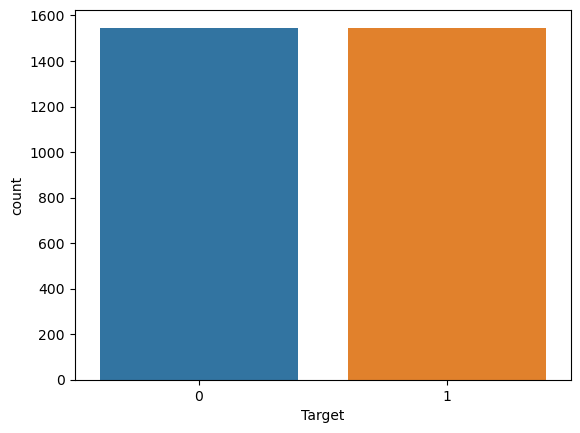

In [133]:
# Plot the count of each class after oversampling
sns.countplot(x=y_train)

In [134]:
#Use RandomForestClassifier as the base mode to select the best features
rf = RandomForestClassifier(random_state=0) 
rfecv = RFECV(rf, cv=3, step=5)
X_train = rfecv.fit_transform(X_train, y_train) 
X_test = rfecv.transform(X_test)
print(f"Number of remaining features: {X_train.shape[1]}")

Number of remaining features: 31


In [174]:
X_train.shape, X_test.shape

((1978, 31), (1089, 31))

# Training the model - Random Forest

In [135]:
#import the RF and the necessary modules from scikitlearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report 

#create a random forest instance
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training set with selected features
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [136]:
#Make predictions on the test set
y_pred = rf.predict(X_test)

In [137]:
#Calculate accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

#Display classification report
print(classification_report(y_test,y_pred))

Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       663
           1       0.92      0.87      0.89       426

    accuracy                           0.92      1089
   macro avg       0.92      0.91      0.91      1089
weighted avg       0.92      0.92      0.92      1089



Accuracy Score: 91.92%


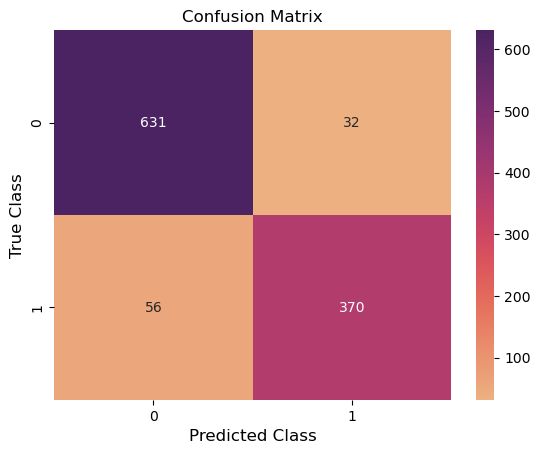

In [138]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%") 
cm = confusion_matrix(y_test,y_pred)
ax = sns.heatmap(cm, cmap='flare',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12) 
plt.ylabel("True Class",fontsize=12) 
plt.title("Confusion Matrix",fontsize=12)
plt.show()

# Hyperparameter tuning - Random forest

In [175]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [191]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid1 = {
    'n_estimators': [10,50,100],
    'max_depth': [10,20,30],
    'min_samples_split': [2,4,5],
    'min_samples_leaf': [1,2,4],}

# Set up GridSearchCV
RF_grid_search1 = GridSearchCV(estimator=rf_classifier, param_grid=param_grid1, scoring='accuracy', cv=3)

# Fit the model with hyperparameter tuning
RF_grid_search1.fit(X_train, y_train)

RF_grid_search1.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [192]:
# Get the best parameters
RF_bestmodel1 = RandomForestClassifier(**RF_grid_search1.best_params_)
RF_bestmodel1.fit(X_train,y_train)

RandomForestClassifier(max_depth=20)

In [193]:
# Evaluate the best model on the validation set
validation_accuracy = RF_bestmodel1.score(X_val, y_val)
print("Accuracy on Validation Set:", validation_accuracy)

Accuracy on Validation Set: 0.9191919191919192


In [194]:
#Predict on the test set and Calculate accuracy on the test set
y_pred1 = RF_bestmodel1.predict(X_test)
test_accuracy1 = accuracy_score(y_test, y_pred1)
print("Test Accuracy:", test_accuracy1)

Test Accuracy: 0.9201101928374655


In [199]:
#evaluate the model's performance
from sklearn import metrics

print('accuracy:%.2f\n'%(test_accuracy1))
print('-------------------------------------')
result = metrics.classification_report(y_test,y_pred1)
print('classification Report:\n')
print(result)

accuracy:0.92

-------------------------------------
classification Report:

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       663
           1       0.92      0.87      0.90       426

    accuracy                           0.92      1089
   macro avg       0.92      0.91      0.92      1089
weighted avg       0.92      0.92      0.92      1089



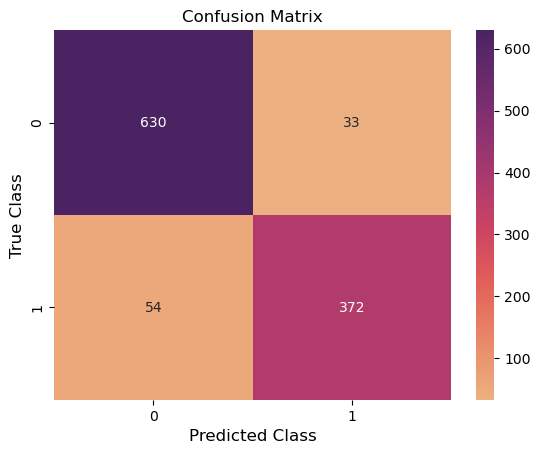

In [197]:
cm1 = metrics.confusion_matrix(y_test, y_pred1)
ax = sns.heatmap(cm1, cmap= 'flare', annot= True, fmt='d')

plt.xlabel("Predicted Class", fontsize= 12)
plt.ylabel("True Class", fontsize= 12)
plt.title("Confusion Matrix", fontsize= 12)

plt.show()

# Random Forest hyperparameter 2

In [145]:
param_grid2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5 , 10, 20],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4],
}

RF_grid_search2 = GridSearchCV(estimator=rf_classifier, param_grid=param_grid2, scoring='accuracy', cv=5, return_train_score=False)
RF_grid_search2.fit(X_train, y_train)
best_params2 = RF_grid_search2.best_params_


In [146]:
RF_bestmodel2 = RandomForestClassifier(**RF_grid_search2.best_params_)
RF_bestmodel2.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=4)

In [147]:
# Evaluate the best model on the validation set
validation_accuracy2 = RF_bestmodel2.score(X_val, y_val)
print("Accuracy on Validation Set:", validation_accuracy2)

Accuracy on Validation Set: 0.9111470113085622


In [148]:
#Predict on the test set and Calculate accuracy on the test set
y_pred2 = RF_bestmodel2.predict(X_test)
test_accuracy2 = accuracy_score(y_test, y_pred2)
print("Test Accuracy:", test_accuracy2)

Test Accuracy: 0.9136822773186409


In [149]:
#evaluate the model's performance

from sklearn import metrics
# Print the results
print("Best Hyperparameters:", best_params2)
print('-------------------------------------')
print('accuracy:%.2f\n'%(test_accuracy2))
print('-------------------------------------')
result = metrics.classification_report(y_test,y_pred2)
print('classification Report:\n')
print(result)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
-------------------------------------
accuracy:0.91

-------------------------------------
classification Report:

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       663
           1       0.90      0.88      0.89       426

    accuracy                           0.91      1089
   macro avg       0.91      0.91      0.91      1089
weighted avg       0.91      0.91      0.91      1089



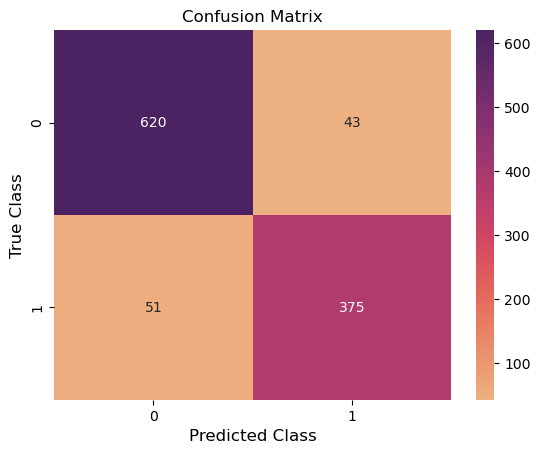

In [150]:
cm2 = metrics.confusion_matrix(y_test, y_pred2)
ax = sns.heatmap(cm2, cmap= 'flare', annot= True, fmt='d')

plt.xlabel("Predicted Class", fontsize= 12)
plt.ylabel("True Class", fontsize= 12)
plt.title("Confusion Matrix", fontsize= 12)

plt.show()

# Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression

#Create a logistic regression instance and fit it to the train set
LG_model = LogisticRegression(random_state=42)
LG_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [201]:
#Fitting the model to the test set for prediction
y_pred3 = LG_model.predict(X_test)
test_accuracy3 = accuracy_score(y_test, y_pred3)
test_accuracy3

0.9109274563820018

In [202]:
#evaluate the model's performance

from sklearn import metrics
#acc = metrics.accuracy_score(y_test, y_pred3)
print('accuracy:%.2f\n'%(test_accuracy3))
print('-------------------------------------')
result = metrics.classification_report(y_test,y_pred3)
print('classification Report:\n')
print(result)

accuracy:0.91

-------------------------------------
classification Report:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       663
           1       0.88      0.90      0.89       426

    accuracy                           0.91      1089
   macro avg       0.91      0.91      0.91      1089
weighted avg       0.91      0.91      0.91      1089



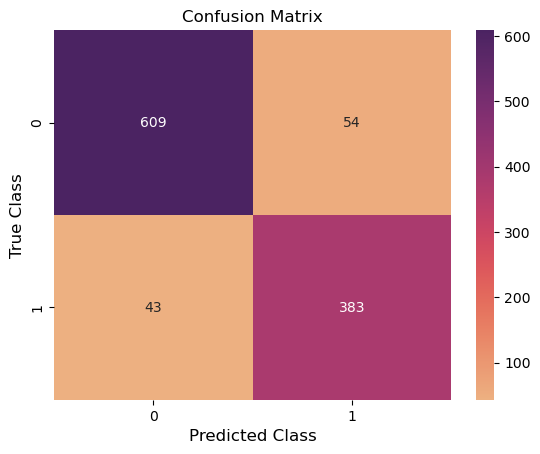

In [204]:
cm3 = metrics.confusion_matrix(y_test, y_pred3)
ax = sns.heatmap(cm3, cmap= 'flare', annot= True, fmt='d')


plt.xlabel("Predicted Class", fontsize= 12)
plt.ylabel("True Class", fontsize= 12)
plt.title("Confusion Matrix", fontsize= 12)

plt.show()

# Hyperparameter tuning on Logistic Regression model

In [212]:
import warnings
warnings.filterwarnings("ignore")

#Define the parameter grid for hyperparameter tuning
param_grid1 = [{'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                'penalty' : ['l1'],
                'C' : [100, 10, 1.0, 0.1, 0.01]}]

LG_model = LogisticRegression(random_state=0)
LG_Gridsearch1= GridSearchCV(estimator=LG_model, param_grid=param_grid1, cv=3, scoring='accuracy')
LG_Gridsearch1.fit(X_train,y_train)
LG_Gridsearch1.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [213]:
LG_bestmodel1 = LogisticRegression(**LG_Gridsearch1.best_params_)
LG_bestmodel1.fit(X_train,y_train)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [214]:
# Evaluate the best model on the validation set
validation_accuracy1 = LG_bestmodel1.score(X_val, y_val)
print("Accuracy on Validation Set:", validation_accuracy1)

Accuracy on Validation Set: 0.9116161616161617


In [215]:
#Predict on the test set and Calculate accuracy on the test set
y_pred4 = LG_bestmodel1.predict(X_test)
test_accuracy4 = accuracy_score(y_test, y_pred4)
print("Accuracy on Test set:", test_accuracy4)

Accuracy on Test set: 0.9155188246097337


In [216]:
#evaluate the performance of model

from sklearn import metrics
#acc = metrics.accuracy_score(y_test, y_pred4)
print('accuracy:%.2f\n\n'%(test_accuracy4))
print('-------------------------------------')
result = metrics.classification_report(y_test,y_pred4)
print('classification Report:\n')
print(result)

accuracy:0.92


-------------------------------------
classification Report:

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       663
           1       0.88      0.91      0.89       426

    accuracy                           0.92      1089
   macro avg       0.91      0.91      0.91      1089
weighted avg       0.92      0.92      0.92      1089



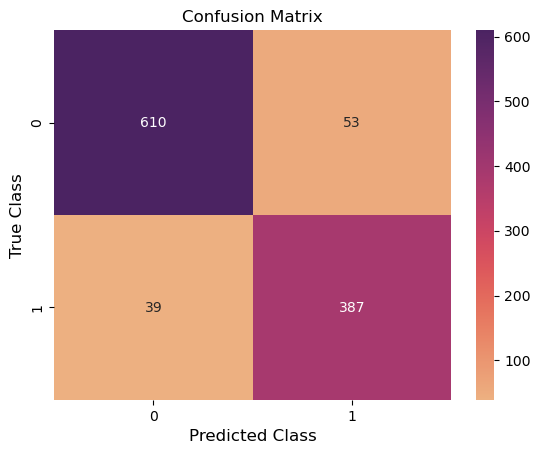

In [217]:
cm4 = metrics.confusion_matrix(y_test, y_pred4)
ax = sns.heatmap(cm4, cmap= 'flare', annot= True, fmt='d')

plt.xlabel("Predicted Class", fontsize= 12)
plt.ylabel("True Class", fontsize= 12)
plt.title("Confusion Matrix", fontsize= 12)

plt.show()

# hyperparameter tuning on Logistic Regression model2

In [162]:
# Define the parameter grid for hyperparameter tuning

param_grid2 = {"C": np.logspace(-4,4,30),
               "solver":['liblinear']}

In [163]:
import warnings
warnings.filterwarnings("ignore")

LG_model = LogisticRegression(random_state=42)
LG_Gridsearch2= GridSearchCV(estimator=LG_model, param_grid=param_grid2, cv=5, scoring='accuracy')
LG_Gridsearch2.fit(X_train,y_train)
LG_Gridsearch2.best_params_

{'C': 0.1082636733874054, 'solver': 'liblinear'}

In [164]:
LG_bestmodel2 = LogisticRegression(**LG_Gridsearch2.best_params_)
LG_bestmodel2.fit(X_train,y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [165]:
# Evaluate the best model on the validation set
validation_accuracy2 = LG_bestmodel2.score(X_val, y_val)
print("Accuracy on Validation Set:", validation_accuracy2)

Accuracy on Validation Set: 0.8917609046849758


In [166]:
#Predict on the test set and Calculate accuracy on the test set
y_pred5 = LG_bestmodel2.predict(X_test)
test_accuracy5 = accuracy_score(y_test, y_pred5)
print("Accuracy on Test set:", test_accuracy5)

Accuracy on Test set: 0.9127640036730946


In [167]:
#evaluate the performance of model

print('accuracy:%.2f\n\n'%(test_accuracy5))
print('-------------------------------------')
result = metrics.classification_report(y_test,y_pred5)
print('classification Report:\n')
print(result)

accuracy:0.91


-------------------------------------
classification Report:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       663
           1       0.88      0.90      0.89       426

    accuracy                           0.91      1089
   macro avg       0.91      0.91      0.91      1089
weighted avg       0.91      0.91      0.91      1089



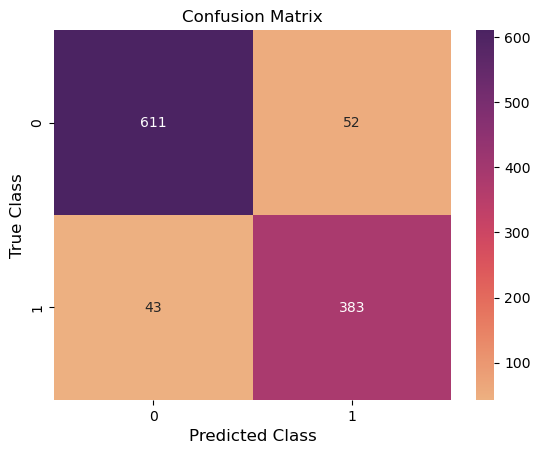

In [168]:
cm5 = metrics.confusion_matrix(y_test, y_pred5)
ax = sns.heatmap(cm5, cmap= 'flare', annot= True, fmt='d')

plt.xlabel("Predicted Class", fontsize= 12)
plt.ylabel("True Class", fontsize= 12)
plt.title("Confusion Matrix", fontsize= 12)

plt.show()

In [225]:
Accuracy_Score_Test_df = pd.DataFrame({
    'Model Name' : ['Random Forest Classifier', 'Logistic Regression'],
    'Test_Accuracy': ['%.2f'%(test_accuracy), '%.2f'%(test_accuracy3)],
    'Test_Accuracy(Hyperparameter Tuning1)' : ['%.2f'%(test_accuracy1), '%.2f'%(test_accuracy4)]
})

Accuracy_Score_Test_df

,Model Name,Test_Accuracy,Test_Accuracy(Hyperparameter Tuning1)
0,Random Forest Classifier,0.92,0.92
1,Logistic Regression,0.91,0.92


In [254]:
from sklearn.metrics import f1_score

F1_Score_Test_df = pd.DataFrame({
    'Model Name': ['Random Forest Classifier', 'Logistic Regression'],
     'F1_score': ['%.2f'%(f1_score(y_test, y_pred)), '%.2f'%(f1_score(y_test, y_pred3))],
     'F1_score(Hyperparameter Tuning1)': ['%.2f'%(f1_score(y_test, y_pred1)), '%.2f'%(f1_score(y_test,y_pred4))],
})

F1_Score_Test_df

,Model Name,F1_score,F1_score(Hyperparameter Tuning1)
0,Random Forest Classifier,0.89,0.90
1,Logistic Regression,0.89,0.89
